In [3]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt
%matplotlib inline
from sklearn import datasets

In [4]:
df = pd.read_csv('iris_data_set.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4B18DCA00>,
      dtype=object)

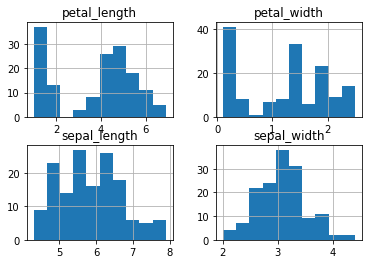

In [5]:
df.hist()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Number of data ....
print(len(df.index))

150


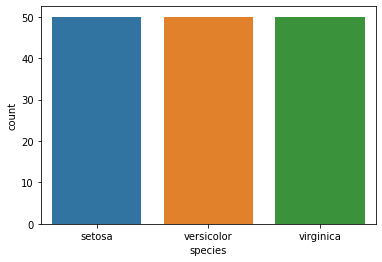

In [8]:
import seaborn as sns
sns.countplot(x = 'species', data=df)

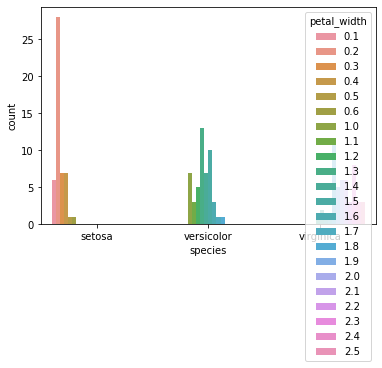

In [9]:
sns.countplot(x = 'species',hue='petal_width',data=df)

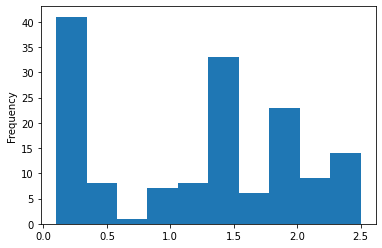

In [10]:
df['petal_width'].plot.hist()

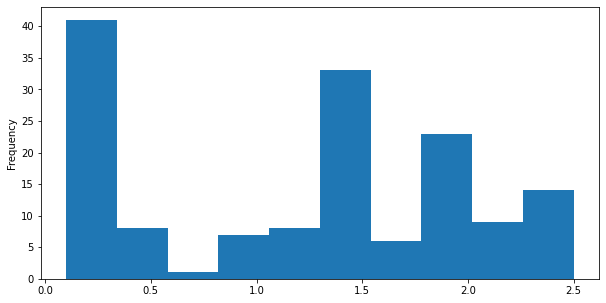

In [11]:
df['petal_width'].plot.hist(bins = 10 , figsize = (10,5))

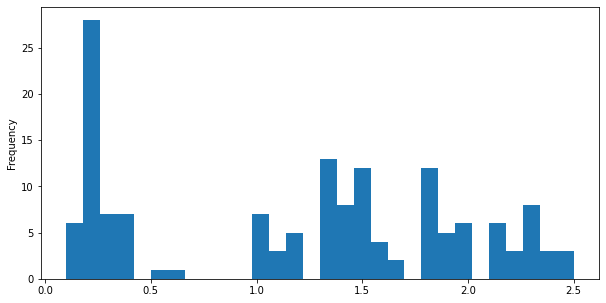

In [10]:
df['petal_width'].plot.hist(bins = 30 , figsize = (10,5))

In [11]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

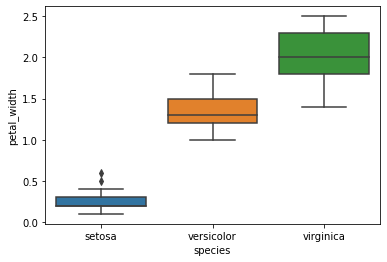

In [13]:
sns.boxplot(x ='species', y = 'petal_width',data=df )

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
sp = pd.get_dummies(df['species'],drop_first=True)
sp.head(5)
df = pd.concat([df,sp],axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [21]:
X = df.iloc[:,:4].values
y = df.iloc[:,6].values
y1 = df.iloc[:,5].values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [22]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3 , random_state = 0)
X_train , X_test , y1_train , y1_test = train_test_split(X , y1 , test_size= 0.3 , random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)
regression = LogisticRegression()
regression.fit(X_train , y1_train)

LogisticRegression()

In [17]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0], dtype=uint8)

In [18]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0], dtype=uint8)

In [19]:
from sklearn import metrics
metrics.confusion_matrix(y_pred,y_test)

array([[33,  0],
       [ 1, 11]], dtype=int64)

In [20]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [31]:
y1_pred = regression.predict(X_test)
y1_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [32]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0], dtype=uint8)

In [33]:
metrics.confusion_matrix(y_test,y1_pred)

array([[31,  3],
       [10,  1]], dtype=int64)

In [34]:
metrics.accuracy_score(y_test , y1_pred)

0.7111111111111111